In [1]:
import warnings
warnings.filterwarnings('ignore')

# Statistical Linear Regression

Assumptions in statistical linear regression:
* The dependent variable should be a linear combination of independent variables
* No autocorrelation in error terms
* Errors should have zero mean and be normally distributed
* No or little multi-collinearity, a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy
* Error terms should be homoscedastic

# Wine Quality Example

In [2]:
import pandas as pd

## 1. Data Loading

In [3]:
dataset = pd.read_csv('winequality-data.csv')
dataset.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            6.7              0.15         0.38             1.7      0.037   
1            6.7              0.44         0.31             1.9      0.030   
2            6.1              0.17         0.21             1.9      0.090   
3            6.6              0.39         0.22             4.0      0.038   
4            6.8              0.32         0.34             6.0      0.050   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 20.0                  84.0  0.99046  3.09       0.53   
1                 41.0                 104.0  0.99000  3.29       0.62   
2                 44.0                 130.0  0.99255  3.07       0.41   
3                 17.0                  98.0  0.99018  3.25       0.53   
4                  5.0                 129.0  0.99530  3.19       0.40   

   alcohol  quality   id  
0     11.4        6  981  
1     12.6        7  982  
2      9.7        5  983  
3     13.0        7  984  
4      9.1        5  985

In [4]:
#change column names
import re
column_names = [re.sub('\.', '_', col) for col in dataset.columns.values]
dataset.columns = column_names
dataset.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.7              0.15         0.38             1.7      0.037   
1            6.7              0.44         0.31             1.9      0.030   
2            6.1              0.17         0.21             1.9      0.090   
3            6.6              0.39         0.22             4.0      0.038   
4            6.8              0.32         0.34             6.0      0.050   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 20.0                  84.0  0.99046  3.09       0.53   
1                 41.0                 104.0  0.99000  3.29       0.62   
2                 44.0                 130.0  0.99255  3.07       0.41   
3                 17.0                  98.0  0.99018  3.25       0.53   
4                  5.0                 129.0  0.99530  3.19       0.40   

   alcohol  quality   id  
0     11.4        6  981  
1     12.6        7  982  
2      9.7        5  983  
3     13.0        7  984  
4      9.1        5  985

In [5]:
#drop id column
dataset.drop('id', axis=1, inplace=True)
dataset.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.7              0.15         0.38             1.7      0.037   
1            6.7              0.44         0.31             1.9      0.030   
2            6.1              0.17         0.21             1.9      0.090   
3            6.6              0.39         0.22             4.0      0.038   
4            6.8              0.32         0.34             6.0      0.050   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 20.0                  84.0  0.99046  3.09       0.53   
1                 41.0                 104.0  0.99000  3.29       0.62   
2                 44.0                 130.0  0.99255  3.07       0.41   
3                 17.0                  98.0  0.99018  3.25       0.53   
4                  5.0                 129.0  0.99530  3.19       0.40   

   alcohol  quality  
0     11.4        6  
1     12.6        7  
2      9.7        5  
3     13.0        7  
4      9.1        5

## 2. Set Training/Test Dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(dataset['alcohol'], dataset['quality'], 
                                                    test_size = 0.3, random_state = 42)

In [8]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

In [9]:
#check train data shape
print(x_train.shape)

(2742, 1)


In [10]:
x_train.head()

alcohol
2053     10.7
1507     12.2
1293     10.6
2758     11.8
1839     10.4

In [11]:
y_train.head()

quality
2053        5
1507        6
1293        6
2758        6
1839        6

## 3. Check Relationship (Simple Linear Regression)

* Find relationship between alcohol content (x) and wine quality (y)

### 3.1 Find Beta

$\hat{\beta_1} = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y_i})}{\sum\limits_{i=1}^n (x_i - \bar{x})} = \frac{cov(x, y)}{var(x)}$

$\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$

In [12]:
#find mean of alcohol content
alcohol_train_mean = x_train.alcohol.mean()
alcohol_train_mean

10.52454534403115

In [13]:
#find mean of wine quality
quality_train_mean = y_train.quality.mean()
quality_train_mean

5.88001458789205

In [14]:
#find variance of alcohol content
alcohol_train_var = x_train.alcohol.var()
alcohol_train_var

1.5324158112919095

In [15]:
#find covariance
alcohol_train_cov = pd.concat([x_train, y_train], axis=1).cov().values[0][1]
alcohol_train_cov

0.5005540866543496

In [16]:
#find beta_1
b_1 = alcohol_train_cov / alcohol_train_var
b_1

0.32664377577281417

In [17]:
#find beta_0
b_0 = quality_train_mean - b_1 * alcohol_train_mean
b_0

2.4422373584255235

We get $\hat{y} = 2.44 + 0.327x$

### 3.2 Goodness of Fit : Calculate $R^2$

* R-squared value is a statistical measure of how close the data are to the fitted regression line

$R^2 = \large \frac{SSR}{SST} = 1 - \large \frac{SSE}{SST}$

SSR is Sum of Squares due to Regression : $\sum\limits_{i=1}^n (\hat{yi} - \bar{y_i})^2$
<br>
SSE is Sum of Squares due to residual error : $\sum\limits_{i=1}^n (y_i - \hat{y_i})^2$
<br>
SST is Total Sum of Squares : $\sum\limits_{i=1}^n (y_i - \bar{y_i})^2$
<br>

$y_i$ is actual value of y and $\hat{y_i}$ is predicted value of y

In [18]:
#predict y using b_1 and b_0
y_pred = b_0 + b_1 * x_test
y_pred.columns = y_test.columns

In [19]:
r_squared = 1 - (((y_test - y_pred)**2).sum() / ((y_test - y_test.mean())**2).sum())

In [20]:
r_squared

quality    0.192343
dtype: float64

### 3.3 Goodness of Fit : Adjusted R^2

$R_{adjusted}^2 = 1 - \large \frac{(1 - R^2)(n - 1)}{n - k - 1}$

In [21]:
x_test.shape

(1176, 1)

In [22]:
adjusted_r_sqrt = 1 - ((1 - r_squared) * (len(x_test) - 1)) / (len(x_test) - 1 - 1)
adjusted_r_sqrt

quality    0.191655
dtype: float64

**The $R^2$ and adjusted-$R^2$ values are very small, so we conclude that there is no relationship between alcohol content and wine quality**

## 4. Multivariate Linear Regression (stats model)

* sklearn and statsmodel

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.metrics import r2_score

### 4.1 Exploratory Data Analysis

In [25]:
# check columns
dataset.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Let's conduct EDA on just 4 columns, due to lack of capability

In [26]:
eda_columns = ['volatile_acidity', 'chlorides', 'sulphates', 'alcohol', 'quality']

In [27]:
sns.set(style='whitegrid', context='notebook')

/Users/jonghobaeck/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


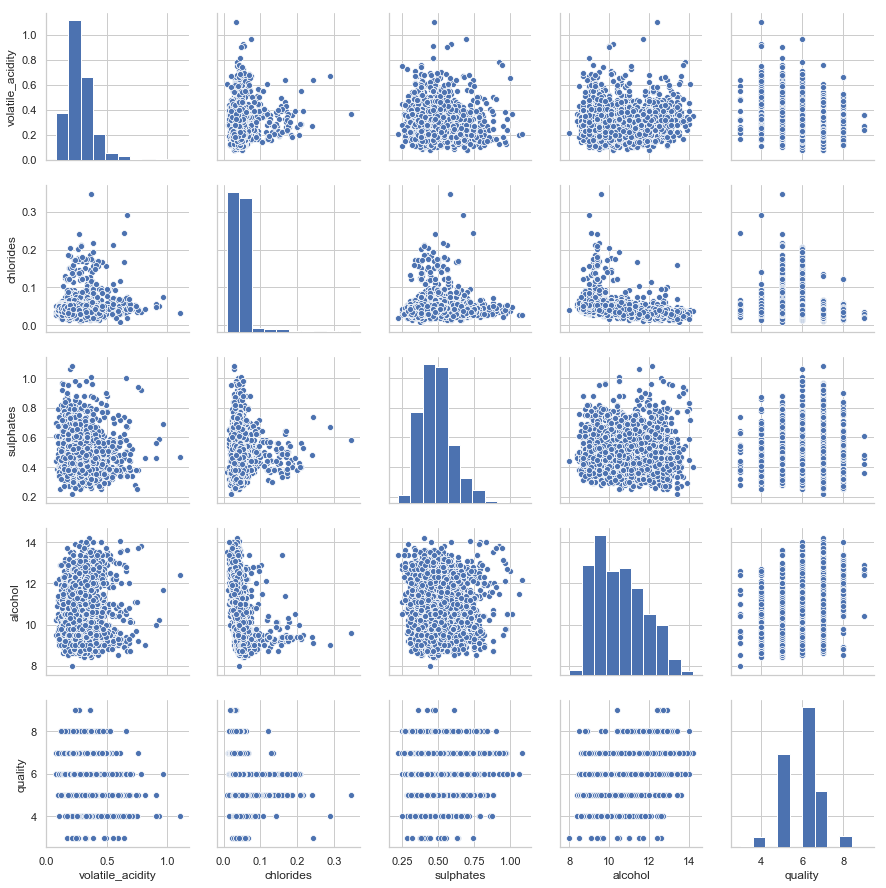

In [28]:
sns.pairplot(dataset[eda_columns], size=2.5, x_vars=eda_columns, y_vars=eda_columns)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

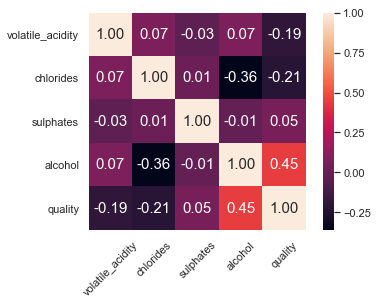

In [29]:
corr_mat = np.corrcoef(dataset[eda_columns].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
                       fmt='.2f', annot_kws={'size': 15},
                       yticklabels=eda_columns, xticklabels=eda_columns)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

### 4.2 Backward Method


Backward method : Operated on all variables to find out p-value and multi-collinearity and reduce irrelevant variables. If the adjusted $R^2$ value is greater than 0.7, we accept the model

In [30]:
#Quality is dependent variable
features = dataset.columns.drop('quality')
features

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [31]:
#all variables excluding quality
x = dataset[features]
x.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.7              0.15         0.38             1.7      0.037   
1            6.7              0.44         0.31             1.9      0.030   
2            6.1              0.17         0.21             1.9      0.090   
3            6.6              0.39         0.22             4.0      0.038   
4            6.8              0.32         0.34             6.0      0.050   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 20.0                  84.0  0.99046  3.09       0.53   
1                 41.0                 104.0  0.99000  3.29       0.62   
2                 44.0                 130.0  0.99255  3.07       0.41   
3                 17.0                  98.0  0.99018  3.25       0.53   
4                  5.0                 129.0  0.99530  3.19       0.40   

   alcohol  
0     11.4  
1     12.6  
2      9.7  
3     13.0  
4      9.1

In [32]:
y = dataset['quality']
y.head()

0    6
1    7
2    5
3    7
4    5
Name: quality, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, train_size=0.7, random_state=42)

In [34]:
#adding constant term
x_train_new = sm.add_constant(x_train)
x_train_new.head()

const  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
2053    1.0            6.8              0.32         0.43             1.6   
1507    1.0            5.1              0.11         0.32             1.6   
1293    1.0            8.2              0.22         0.49             9.6   
2758    1.0            6.8              0.26         0.26             2.0   
1839    1.0            7.0              0.21         0.28             8.6   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
2053      0.050                  4.0                  65.0  0.99346  3.27   
1507      0.028                 12.0                  90.0  0.99008  3.57   
1293      0.037                 53.0                 154.0  0.99510  3.02   
2758      0.019                 23.5                  72.0  0.99041  3.16   
1839      0.045                 37.0                 221.0  0.99540  3.25   

      sulphates  alcohol  
2053       0.47     10.7  
1507       0.52     12.2  
1293       0.33     10.6  
2758       0.47     11.8  
1839       0.54     10.4

In [35]:
#adding intercept-column
x_test_new = sm.add_constant(x_test)
x_test_new.head()

const  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
270     1.0            7.8              0.17         0.50            1.30   
3365    1.0            7.5              0.29         0.26           14.95   
803     1.0            6.2              0.35         0.29            3.90   
2984    1.0            6.8              0.27         0.26           16.10   
1978    1.0            6.7              0.66         0.00           13.00   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
270       0.045                 35.0                 140.0  0.99040  3.16   
3365      0.067                 47.0                 178.0  0.99838  3.04   
803       0.041                 22.0                  79.0  0.99005  3.10   
2984      0.049                 55.0                 196.0  0.99840  3.15   
1978      0.033                 32.0                  75.0  0.99551  3.15   

      sulphates    alcohol  
270        0.40  12.000000  
3365       0.49   9.200000  
803        0.59  12.066667  
2984       0.50   9.300000  
1978       0.50  10.700000

In [36]:
#create a model
lr_model = sm.OLS(y_train, x_train_new)
lr_model

In [37]:
#model fit
fitted_lr = lr_model.fit()

In [38]:
# analyze summary
fitted_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          3.02e-201
Time:                        22:16:15   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6184.
Df Residuals:                    2730   BIC:                             6255.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  133.6311     22.199      6.020      0.000      90.103     177.159
fixed_acidity            0.0638      0.026      2.453      0.014       0.013       0.115
volatile_acidity        -1.8664      0.155    -12.037      0.000      -2.170      -1.562
citric_acid              0.0213      0.127      0.169      0.866      -0.227       0.270
residual_sugar           0.0823      0.009      8.894      0.000       0.064       0.100
chlorides               -0.8567      0.804     -1.066      0.286      -2.432       0.719
free_sulfur_dioxide      0.0033      0.001      3.033      0.002       0.001       0.005
total_sulfur_dioxide    -0.0001      0.000     -0.266      0.790      -0.001       0.001
density               -133.8388     22.529     -5.941      0.000    -178.015     -89.663
pH                       0.6434      0.136      4.744      0.000       0.377       0.909
sulphates                0.4929      0.133      3.703      0.000       0.232       0.754
alcohol                  0.2355      0.029      8.101      0.000       0.178       0.292
==============================================================================
Omnibus:                       64.279   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.481
Skew:                           0.100   Prob(JB):                     6.28e-30
Kurtosis:                       4.066   Cond. No.                     3.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Tuning**

* AIC : 6184 (absolute value is not important. Relative values are important compared to a modified model
* Adjusted R2 : 0.296 (has to be above 0.7)
* Significance of variable (p-value) : has to be below 0.05
* VIF : Below 5

### 4.2.3 VIF on Independent Variables

For example, **fixed_acidity**

$VIF = \large \frac{1}{1 - R^2}$

In [39]:
#create a new feature list excluding fixed_acidity
copied_features = features.values.tolist()
var = 'fixed_acidity'
copied_features.remove(var)

In [40]:
#create linear-regression model
lr_model = sm.OLS(x_train[var], sm.add_constant(x_train[copied_features]))

In [41]:
fitted_lr_model = lr_model.fit()

In [42]:
#find VIF
vif = 1 / (1 - fitted_lr_model.rsquared)
vif

2.4444445521180613

In [43]:
def get_vif():
    for i in np.arange(0, len(features)):
        copied_features = features.values.tolist()
        var = copied_features[i]
        copied_features.remove(var)
        vif_model = sm.OLS(x_train[var],
                           sm.add_constant(x_train[copied_features]))
        fitted_lr_model = vif_model.fit()
        vif = 1 / (1 - fitted_lr_model.rsquared)
        print(var, round(vif, 4))

In [44]:
get_vif()

fixed_acidity 2.4444
volatile_acidity 1.1451
citric_acid 1.1708
residual_sugar 11.08
chlorides 1.2334
free_sulfur_dioxide 1.8023
total_sulfur_dioxide 2.2669
density 23.6158
pH 2.0624
sulphates 1.1289
alcohol 6.3817


* density has the highest VIF value
* citric_acid has the highest p-value
* We first remove the variable with highest (irrelevant) p-value from the test model
* Let's remove citric_acid

### 4.2.4 Remove citric_acid

In [45]:
features = features.drop('citric_acid')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [46]:
# model
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# learning
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          2.77e-202
Time:                        22:16:17   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6182.
Df Residuals:                    2731   BIC:                             6247.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  133.3886     22.148      6.023      0.000      89.960     176.817
fixed_acidity            0.0645      0.026      2.510      0.012       0.014       0.115
volatile_acidity        -1.8703      0.153    -12.203      0.000      -2.171      -1.570
residual_sugar           0.0822      0.009      8.896      0.000       0.064       0.100
chlorides               -0.8431      0.799     -1.055      0.292      -2.411       0.724
free_sulfur_dioxide      0.0033      0.001      3.043      0.002       0.001       0.005
total_sulfur_dioxide    -0.0001      0.000     -0.262      0.793      -0.001       0.001
density               -133.5916     22.478     -5.943      0.000    -177.666     -89.517
pH                       0.6415      0.135      4.747      0.000       0.377       0.906
sulphates                0.4939      0.133      3.715      0.000       0.233       0.755
alcohol                  0.2360      0.029      8.159      0.000       0.179       0.293
==============================================================================
Omnibus:                       64.204   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.260
Skew:                           0.100   Prob(JB):                     7.01e-30
Kurtosis:                       4.065   Cond. No.                     3.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
get_vif()

fixed_acidity 2.3853
volatile_acidity 1.1192
residual_sugar 11.065
chlorides 1.221
free_sulfur_dioxide 1.7997
total_sulfur_dioxide 2.2655
density 23.5158
pH 2.0481
sulphates 1.1265
alcohol 6.3193


**Model Comparison**

* AIC : 6184 → 6182
* Adjusted R2 : 0.296 → 0.296
* p-value for variable significance : **total_sulfur_dioxide** is highest
* VIF : density is highest

Now remove **total_sulfur_dioxide**

### 4.2.4 Remove total_sulfur_dioxide

In [48]:
features = features.drop('total_sulfur_dioxide')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [49]:
# model
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# train
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          2.45e-203
Time:                        22:16:19   Log-Likelihood:                -3080.2
No. Observations:                2742   AIC:                             6180.
Df Residuals:                    2732   BIC:                             6240.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 134.3467     21.841      6.151      0.000      91.520     177.173
fixed_acidity           0.0646      0.026      2.514      0.012       0.014       0.115
volatile_acidity       -1.8787      0.150    -12.538      0.000      -2.173      -1.585
residual_sugar          0.0825      0.009      8.961      0.000       0.064       0.101
chlorides              -0.8462      0.799     -1.059      0.290      -2.413       0.721
free_sulfur_dioxide     0.0032      0.001      3.620      0.000       0.001       0.005
density              -134.5645     22.166     -6.071      0.000    -178.028     -91.101
pH                      0.6410      0.135      4.745      0.000       0.376       0.906
sulphates               0.4906      0.132      3.708      0.000       0.231       0.750
alcohol                 0.2360      0.029      8.163      0.000       0.179       0.293
==============================================================================
Omnibus:                       64.241   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.241
Skew:                           0.101   Prob(JB):                     7.08e-30
Kurtosis:                       4.065   Cond. No.                     9.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
get_vif()

fixed_acidity 2.3848
volatile_acidity 1.0701
residual_sugar 10.9683
chlorides 1.2208
free_sulfur_dioxide 1.1424
density 22.8755
pH 2.0478
sulphates 1.1165
alcohol 6.3191


**Model Comparison**

* AIC : 6182 → 6180
* Adjusted R2 : 0.296 → 0.297
* p-value for variable significance : chlorides is highest
* VIF : density is highest

Now remove chlorides

In [51]:
features = features.drop('chlorides')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [52]:
# model
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# learning
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          3.43e-204
Time:                        22:16:21   Log-Likelihood:                -3080.8
No. Observations:                2742   AIC:                             6180.
Df Residuals:                    2733   BIC:                             6233.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 138.0004     21.567      6.399      0.000      95.711     180.290
fixed_acidity           0.0684      0.025      2.693      0.007       0.019       0.118
volatile_acidity       -1.8934      0.149    -12.690      0.000      -2.186      -1.601
residual_sugar          0.0842      0.009      9.309      0.000       0.066       0.102
free_sulfur_dioxide     0.0031      0.001      3.572      0.000       0.001       0.005
density              -138.3946     21.869     -6.328      0.000    -181.276     -95.513
pH                      0.6634      0.133      4.971      0.000       0.402       0.925
sulphates               0.4938      0.132      3.732      0.000       0.234       0.753
alcohol                 0.2370      0.029      8.200      0.000       0.180       0.294
==============================================================================
Omnibus:                       63.818   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.766
Skew:                           0.101   Prob(JB):                     1.48e-29
Kurtosis:                       4.059   Cond. No.                     8.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
get_vif()

fixed_acidity 2.3363
volatile_acidity 1.061
residual_sugar 10.6052
free_sulfur_dioxide 1.1396
density 22.2663
pH 1.9978
sulphates 1.116
alcohol 6.3128


**Model Comparison**

* AIC : 6180 → 6180
* Adjusted R2 : 0.297 → 0.297
* p-value for variable significance : all below 0.05
* VIF : density is highest

Now remove density

In [54]:
features = features.drop('density')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [55]:
# model
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# learning
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          1.02e-196
Time:                        22:16:22   Log-Likelihood:                -3100.7
No. Observations:                2742   AIC:                             6217.
Df Residuals:                    2734   BIC:                             6265.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5454      0.447      3.454      0.001       0.668       2.423
fixed_acidity          -0.0410      0.019     -2.186      0.029      -0.078      -0.004
volatile_acidity       -2.0404      0.148    -13.747      0.000      -2.331      -1.749
residual_sugar          0.0308      0.003      9.382      0.000       0.024       0.037
free_sulfur_dioxide     0.0035      0.001      3.943      0.000       0.002       0.005
pH                      0.1636      0.108      1.510      0.131      -0.049       0.376
sulphates               0.2630      0.128      2.053      0.040       0.012       0.514
alcohol                 0.3999      0.013     30.271      0.000       0.374       0.426
==============================================================================
Omnibus:                       62.933   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.887
Skew:                           0.080   Prob(JB):                     8.45e-30
Kurtosis:                       4.071   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
get_vif()

fixed_acidity 1.2545
volatile_acidity 1.0352
residual_sugar 1.3777
free_sulfur_dioxide 1.1353
pH 1.2979
sulphates 1.0312
alcohol 1.3007


**Model Comparison**

* AIC : 6180 → 6217
* Adjusted R2 : 0.297 → 0.287
* p-value for variable significance : pH is highest
* VIF : all below 2

Now remove pH

In [57]:
features = features.drop('pH')
features

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'free_sulfur_dioxide', 'sulphates', 'alcohol'],
      dtype='object')

In [58]:
# model
lr_model = sm.OLS(y_train, 
                  sm.add_constant(x_train[features]))
# learn
fitted_lr_model = lr_model.fit()
fitted_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     184.2
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          2.23e-197
Time:                        22:16:23   Log-Likelihood:                -3101.9
No. Observations:                2742   AIC:                             6218.
Df Residuals:                    2735   BIC:                             6259.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1370      0.216      9.888      0.000       1.713       2.561
fixed_acidity          -0.0529      0.017     -3.105      0.002      -0.086      -0.019
volatile_acidity       -2.0472      0.148    -13.796      0.000      -2.338      -1.756
residual_sugar          0.0301      0.003      9.259      0.000       0.024       0.036
free_sulfur_dioxide     0.0035      0.001      3.993      0.000       0.002       0.005
sulphates               0.2933      0.127      2.319      0.020       0.045       0.541
alcohol                 0.4001      0.013     30.277      0.000       0.374       0.426
==============================================================================
Omnibus:                       62.262   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.431
Skew:                           0.088   Prob(JB):                     4.76e-29
Kurtosis:                       4.054   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
get_vif()

fixed_acidity 1.0338
volatile_acidity 1.0343
residual_sugar 1.3482
free_sulfur_dioxide 1.134
sulphates 1.0057
alcohol 1.3007


**Model Comparison**

* AIC : 6217 → 6218
* Adjusted R2 : 0.287 → 0.286
* p-value for variable significance : all below 0
* VIF : all below 2

After 6 interations, we concluded that there exist no strong correlation between independent/dependent variables. We can conduct another test to verify test data's $R^2$ value

In [60]:
lr_test_model = sm.OLS(y_test,
                       sm.add_constant(x_test[features]))
fitted_lr_test_model = lr_test_model.fit()
fitted_lr_test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     74.69
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           5.58e-79
Time:                        22:16:24   Log-Likelihood:                -1345.9
No. Observations:                1176   AIC:                             2706.
Df Residuals:                    1169   BIC:                             2741.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6163      0.340      7.687      0.000       1.948       3.284
fixed_acidity          -0.0765      0.028     -2.743      0.006      -0.131      -0.022
volatile_acidity       -2.1259      0.216     -9.856      0.000      -2.549      -1.703
residual_sugar          0.0159      0.005      3.076      0.002       0.006       0.026
free_sulfur_dioxide     0.0031      0.001      2.084      0.037       0.000       0.006
sulphates               0.5919      0.194      3.050      0.002       0.211       0.973
alcohol                 0.3693      0.021     17.727      0.000       0.328       0.410
==============================================================================
Omnibus:                       25.579   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.130
Skew:                           0.028   Prob(JB):                     4.79e-12
Kurtosis:                       4.030   Cond. No.                         645.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test data's adjusted $R^2$ is only 0.273, our current model does not clearly explain the wine quality data

## 4. Multivariate Linear Regression (Machine Learning Model)

In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [62]:
x_train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2053            6.8              0.32         0.43             1.6      0.050   
1507            5.1              0.11         0.32             1.6      0.028   
1293            8.2              0.22         0.49             9.6      0.037   
2758            6.8              0.26         0.26             2.0      0.019   
1839            7.0              0.21         0.28             8.6      0.045   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
2053                  4.0                  65.0  0.99346  3.27       0.47   
1507                 12.0                  90.0  0.99008  3.57       0.52   
1293                 53.0                 154.0  0.99510  3.02       0.33   
2758                 23.5                  72.0  0.99041  3.16       0.47   
1839                 37.0                 221.0  0.99540  3.25       0.54   

      alcohol  
2053     10.7  
1507     12.2  
1293     10.6  
2758     11.8  
1839     10.4

**Standarize each feature for optimazation speed**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
# each standardization (mean : 0, standard deviation : 1) 
scaler = StandardScaler()
transformer = scaler.fit(x_train)
scaled_x_train = transformer.transform(x_train)

In [65]:
scaled_x_train[:2]

array([[-0.07355793,  0.44889664,  0.7874971 , -0.93496096,  0.24643498,
        -1.7975289 , -1.70104973, -0.1846153 ,  0.53819484, -0.18341078,
         0.14176068],
       [-2.05898312, -1.68777345, -0.11629224, -0.93496096, -0.87130516,
        -1.33847314, -1.12270817, -1.28494853,  2.52776468,  0.25642862,
         1.35370357]])

**We use SDGRegressor when we want to find linear regression model using Gradient Descent**

In [66]:
lr_model = SGDRegressor()
lr_model.fit(scaled_x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [67]:
lr_model.score(scaled_x_train, y_train)

0.29608833195092377

In [68]:
#scale test data using the same scaler
scaled_x_test = scaler.transform(x_test)

In [70]:
#r2 value for the scaled test data
lr_model.score(scaled_x_test, y_test)

0.2709275173979916

## 5. Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
#different test lambda values
lambdas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]

In [73]:
from collections import defaultdict

In [74]:
r_squares = defaultdict(dict)

for lam in lambdas:
    ridge_reg = Ridge(alpha=lam)
    ridge_reg.fit(x_train, y_train)
    r_squares[lam]['train'] = ridge_reg.score(x_train, y_train)
    r_squares[lam]['test'] = ridge_reg.score(x_test, y_test)

In [75]:
r_squares

defaultdict(dict,
            {0.0001: {'train': 0.2988906634152063, 'test': 0.2746499985162473},
             0.001: {'train': 0.2968905938184835, 'test': 0.2730220826044133},
             0.01: {'train': 0.29159367756153587, 'test': 0.26970726208887497},
             0.1: {'train': 0.2900774705838298, 'test': 0.26907905782136665},
             0.5: {'train': 0.2897893195667298, 'test': 0.26960490495937883},
             1.0: {'train': 0.2895724849587272, 'test': 0.269823858835609},
             5.0: {'train': 0.28786874680078745, 'test': 0.26845780930937657},
             10.0: {'train': 0.28518408142004026, 'test': 0.265259478839144}})

In [76]:
best_ridge_reg = Ridge(0.0001)
best_ridge_reg.fit(x_train, y_train)
for col, coef in zip(x_train.columns, best_ridge_reg.coef_):
    print(col, ':', round(coef,5))

fixed_acidity : 0.05524
volatile_acidity : -1.87461
citric_acid : 0.01725
residual_sugar : 0.078
chlorides : -0.91685
free_sulfur_dioxide : 0.00341
total_sulfur_dioxide : -0.00017
density : -122.64481
pH : 0.60338
sulphates : 0.47627
alcohol : 0.24792


## 6. Lasso Regression

In [77]:
from sklearn.linear_model import Lasso

In [78]:
lasso_r_squares = defaultdict(dict)

for lam in lambdas:
    lasso_reg = Lasso(alpha=lam)
    lasso_reg.fit(x_train, y_train)
    lasso_r_squares[lam]['train'] = lasso_reg.score(x_train, y_train)
    lasso_r_squares[lam]['test'] = lasso_reg.score(x_test, y_test)

In [79]:
lasso_r_squares

defaultdict(dict,
            {0.0001: {'train': 0.2898522489419467,
              'test': 0.26918735870868515},
             0.001: {'train': 0.28855743905599374, 'test': 0.2696176069157763},
             0.01: {'train': 0.2713854120325204, 'test': 0.2479217142864596},
             0.1: {'train': 0.22459562679440848, 'test': 0.2052077542673949},
             0.5: {'train': 0.048107937050793415, 'test': 0.05243735493752155},
             1.0: {'train': 0.03966685006310011, 'test': 0.04473510764054722},
             5.0: {'train': 0.011742746111210511,
              'test': 0.013393926809464163},
             10.0: {'train': 0.0, 'test': -8.864723189483392e-05}})

In [80]:
best_lasso_reg = Lasso(0.0001)
best_lasso_reg.fit(x_test, y_test)
for col, coef in zip(x_train.columns, best_lasso_reg.coef_):
    print(col, ':', round(coef, 5))

fixed_acidity : -0.06387
volatile_acidity : -2.04206
citric_acid : 0.01426
residual_sugar : 0.01716
chlorides : -0.02107
free_sulfur_dioxide : 0.00467
total_sulfur_dioxide : -0.00114
density : -0.0
pH : 0.09337
sulphates : 0.61406
alcohol : 0.35825
